   duration  protocol_type  service  flag  src_bytes  dst_bytes      land  \
0 -0.112716              1       20     9  -0.007360  -0.004623 -0.014004   
1 -0.112716              2       44     9  -0.007423  -0.004623 -0.014004   
2 -0.112716              1       49     5  -0.007450  -0.004623 -0.014004   
3 -0.112716              1       24     9  -0.007408  -0.002427 -0.014004   
4 -0.112716              1       24     9  -0.007414  -0.004510 -0.014004   

   wrong_fragment    urgent      hot  ...  dst_host_srv_count  \
0       -0.085118 -0.010425 -0.09417  ...           -0.848781   
1       -0.085118 -0.010425 -0.09417  ...           -1.064599   
2       -0.085118 -0.010425 -0.09417  ...           -0.839789   
3       -0.085118 -0.010425 -0.09417  ...            1.219478   
4       -0.085118 -0.010425 -0.09417  ...            1.219478   

   dst_host_same_srv_rate  dst_host_diff_srv_rate  \
0               -0.812254               -0.279291   
1               -1.191758               

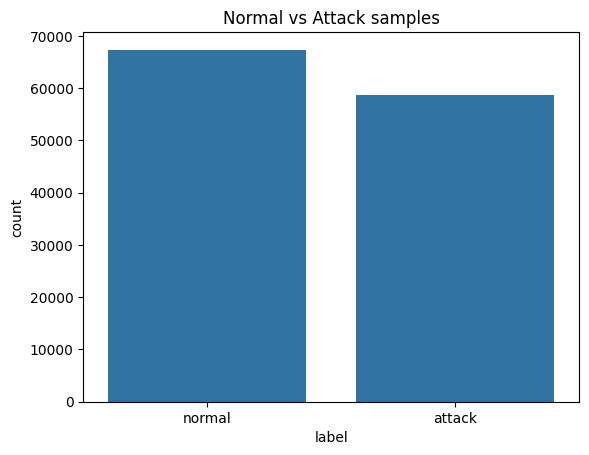

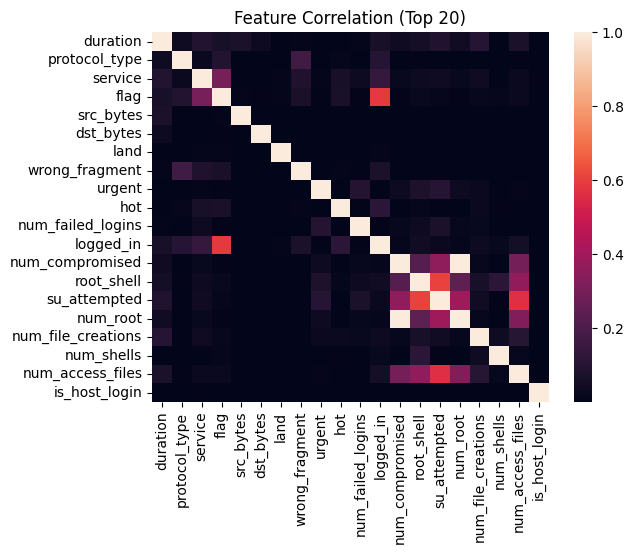

In [6]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

train = pd.read_csv("../data/processed/train_processed.csv")
print(train.head())

# Class balance
sns.countplot(x='label', data=train)
plt.title("Normal vs Attack samples")
plt.show()

# Correlation heatmap (top 20)
corr = train.drop(columns=['label']).corr().abs()
sns.heatmap(corr.iloc[:20, :20])
plt.title("Feature Correlation (Top 20)")
plt.show()